C:\Users\atres\AppData\Local\Temp\ipykernel_1252\1902510147.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dftitle = pd.read_sql(queryjobtitle, connection)


                       JobTitle  AvgSickLeaveHours  TotalSickLeaveHours  \
0  Production Technician - WC40                 49                 1287   
1  Production Technician - WC50                 43                 1120   
2  Production Technician - WC10                 65                 1109   
3  Production Technician - WC30                 36                  919   
4  Production Technician - WC45                 59                  896   
5  Production Technician - WC60                 33                  858   
6  Production Technician - WC20                 25                  550   
7          Sales Representative                 35                  493   
8                         Buyer                 47                  430   
9                       Janitor                 64                  258   

   EmployeeCount  
0             26  
1             26  
2             17  
3             25  
4             15  
5             26  
6             22  
7             14  
8  

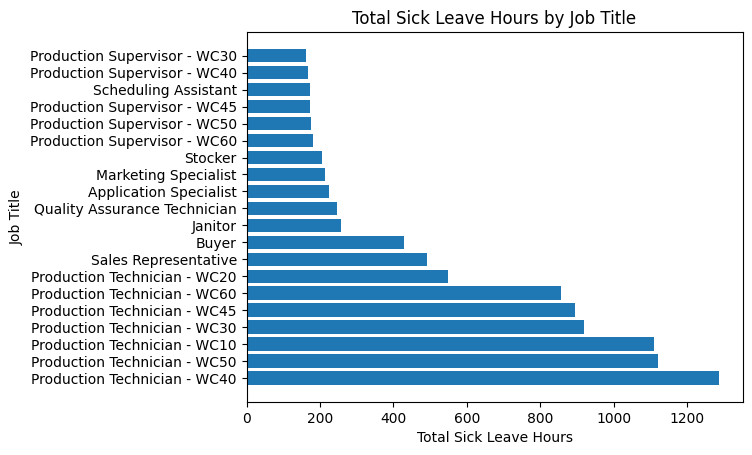

In [36]:
import pyodbc
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Establish connection to the AdventureWorks2022 database using pyodbc
connection = pyodbc.connect(
    r'DRIVER={ODBC Driver 17 for SQL Server};'  # Specifies the ODBC driver to use
    r'SERVER=DESKTOP-G1HPGDT\SQLEXPRESS;'       # Specifies the SQL Server instance
    r'DATABASE=AdventureWorks2022;'            # Specifies the database name
    r'Trusted_Connection=yes;'                 # Enables Windows Authentication
    r'TrustServerCertificate=yes;'             # Allows untrusted certificates (use carefully in production)
)

queryjobtitle = """ SELECT TOP 20
    e.JobTitle,
	AVG(e.SickLeaveHours) AS AvgSickLeaveHours,
	SUM(e.SickLeaveHours) AS TotalSickLeaveHours,
	COUNT(*) AS EmployeeCount
FROM 
    HumanResources.Employee e
GROUP BY
    e.JobTitle
ORDER BY 
    TotalSickLeaveHours DESC;
  """
dftitle = pd.read_sql(queryjobtitle, connection)
print(dftitle.head(10))
dftitle2 = dftitle.sort_values('TotalSickLeaveHours', ascending=False)
plt.barh(dftitle2['JobTitle'], dftitle2['TotalSickLeaveHours'])
plt.xlabel('Total Sick Leave Hours')
plt.ylabel('Job Title')
plt.title("Total Sick Leave Hours by Job Title")
plt.show()
# close the connection
connection.close()

  PersonType  AvgSickLeaveHours  TotalSickLeaveHours  EmployeeCount
0         EM                 46                12559            273
1         SP                 34                  580             17


C:\Users\atres\AppData\Local\Temp\ipykernel_1252\867337060.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfpersontype = pd.read_sql(querypersontype, connection)


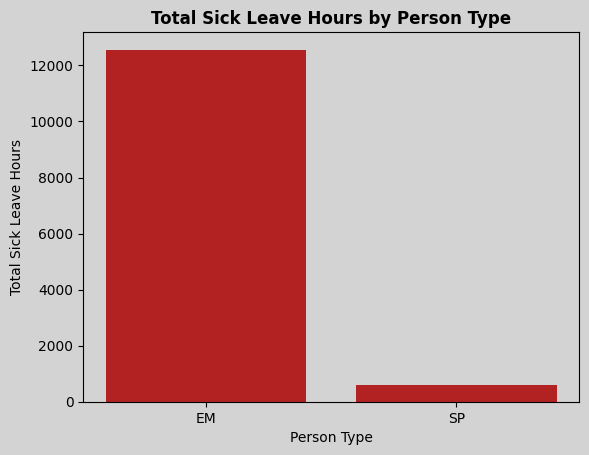

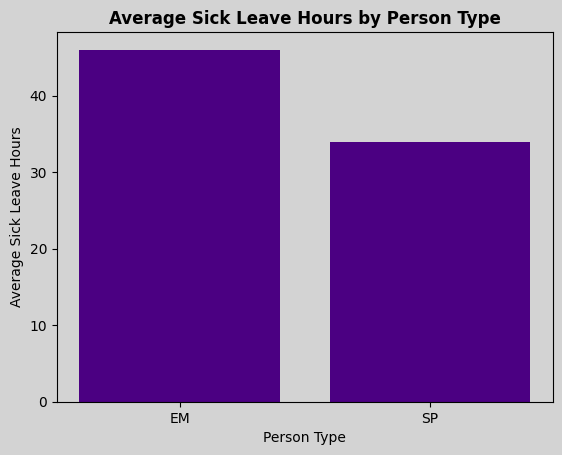

In [72]:
import pyodbc
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Establish connection to the AdventureWorks2022 database using pyodbc
connection = pyodbc.connect(
    r'DRIVER={ODBC Driver 17 for SQL Server};'  # Specifies the ODBC driver to use
    r'SERVER=DESKTOP-G1HPGDT\SQLEXPRESS;'       # Specifies the SQL Server instance
    r'DATABASE=AdventureWorks2022;'            # Specifies the database name
    r'Trusted_Connection=yes;'                 # Enables Windows Authentication
    r'TrustServerCertificate=yes;'             # Allows untrusted certificates (use carefully in production)
)

# Define the SQL query to analyze the relationship between PersonType and sick leave
querypersontype = """ 
SELECT
    p.PersonType,                                 
    AVG(e.SickLeaveHours) AS AvgSickLeaveHours,  
    SUM(e.SickLeaveHours) AS TotalSickLeaveHours,
    COUNT(*) AS EmployeeCount                    
FROM 
    HumanResources.Employee AS e                 
JOIN 
    Person.Person AS p                           
    ON e.BusinessEntityID = p.BusinessEntityID  
GROUP BY 
    p.PersonType                                
ORDER BY 
    TotalSickLeaveHours DESC;                   
"""

# Execute the SQL query and load the results into a Pandas DataFrame
dfpersontype = pd.read_sql(querypersontype, connection)

# Print the first few rows of the DataFrame to inspect the results
print(dfpersontype.head())

# Plot the total sick leave hours for each person type as a bar chart
plt.bar(dfpersontype['PersonType'], dfpersontype['TotalSickLeaveHours'], color='firebrick')
plt.gca().set_facecolor('lightgray')
plt.gcf().set_facecolor('lightgray')
 # Label for x-axis
plt.xlabel('Person Type')                       
 # Label for y-axis
plt.ylabel('Total Sick Leave Hours')            
# Chart title
plt.title('Total Sick Leave Hours by Person Type', fontweight='bold')  
# Display the bar chart
plt.show()                                       

# Plot the average sick leave hours for each person type as a bar chart
ax=plt.bar(dfpersontype['PersonType'], dfpersontype['AvgSickLeaveHours'], color='indigo')
plt.gca().set_facecolor('lightgray')
plt.gcf().set_facecolor('lightgray')
# Label for x-axis
plt.xlabel('Person Type')                     
 # Label for y-axis
plt.ylabel('Average Sick Leave Hours')          
# Chart title
plt.title('Average Sick Leave Hours by Person Type', fontweight='bold')  
# Display the bar chart
plt.show()                                       

# Close the database connection to free up resources
connection.close()
